<a href="https://colab.research.google.com/github/qndbsxo/Data-Analysis/blob/main/Projects/1_a_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%9D%B8%EA%B5%AC%EC%A1%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PYTHON PROGRAMMING 


## Import Libraries
---

In [ ]:
import numpy as np # for linear algebra
import pandas as pd # for data preprocessing
import matplotlib.pyplot as plt # for visualization
import seaborn as sb # for visualization
import warnings 
warnings.filterwarnings(action='ignore')

## maptplotlib 한글 사용코드
---

In [ ]:
# matplotlib 한글사용코드
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


# EDA
---

In [ ]:
df = pd.read_csv('age.csv', encoding='cp949',thousands=',') # import csv
df # check

In [ ]:
df.head(50) # 최상단 50개

In [ ]:
df.tail(50) #  최하단 50개

In [ ]:
df.describe() # 기술통계

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Columns: 104 entries, 행정구역 to 2019년07월_계_100세 이상
dtypes: int64(103), object(1)
memory usage: 3.0+ MB


## 실습 1. '삼청동' 의 인구 구조를,  0세부터 100세 까지 나이대 별로 몇명이 있는지 시각화 하세요. 
- 가로축은 나이, 세로축은 인구수

In [ ]:
df_samcheondong = df.drop(columns=['2019년07월_계_총인구수', '2019년07월_계_연령구간인구수' ]) # 데이터프레임에서 총인구수, 연령구간인구수 컬럼 삭제
df.columns # for check

Index(['행정구역', '2019년07월_계_총인구수', '2019년07월_계_연령구간인구수', '2019년07월_계_0세',
       '2019년07월_계_1세', '2019년07월_계_2세', '2019년07월_계_3세', '2019년07월_계_4세',
       '2019년07월_계_5세', '2019년07월_계_6세',
       ...
       '2019년07월_계_91세', '2019년07월_계_92세', '2019년07월_계_93세', '2019년07월_계_94세',
       '2019년07월_계_95세', '2019년07월_계_96세', '2019년07월_계_97세', '2019년07월_계_98세',
       '2019년07월_계_99세', '2019년07월_계_100세 이상'],
      dtype='object', length=104)

In [ ]:
# 행정구역 컬럼에서 value에 '삼청동'이 포함된 value 찾기
df_samcheondong = df_samcheondong[df_samcheondong['행정구역'].str.contains('삼청동')]

# 행정구역 컬럼 제거
df_samcheondong = df_samcheondong.drop(columns='행정구역')
df_samcheondong # for check

,2019년07월_계_0세,2019년07월_계_1세,2019년07월_계_2세,2019년07월_계_3세,2019년07월_계_4세,2019년07월_계_5세,2019년07월_계_6세,2019년07월_계_7세,2019년07월_계_8세,2019년07월_계_9세,2019년07월_계_10세,2019년07월_계_11세,2019년07월_계_12세,2019년07월_계_13세,2019년07월_계_14세,2019년07월_계_15세,2019년07월_계_16세,2019년07월_계_17세,2019년07월_계_18세,2019년07월_계_19세,2019년07월_계_20세,2019년07월_계_21세,2019년07월_계_22세,2019년07월_계_23세,2019년07월_계_24세,2019년07월_계_25세,2019년07월_계_26세,2019년07월_계_27세,2019년07월_계_28세,2019년07월_계_29세,2019년07월_계_30세,2019년07월_계_31세,2019년07월_계_32세,2019년07월_계_33세,2019년07월_계_34세,2019년07월_계_35세,2019년07월_계_36세,2019년07월_계_37세,2019년07월_계_38세,2019년07월_계_39세,...,2019년07월_계_61세,2019년07월_계_62세,2019년07월_계_63세,2019년07월_계_64세,2019년07월_계_65세,2019년07월_계_66세,2019년07월_계_67세,2019년07월_계_68세,2019년07월_계_69세,2019년07월_계_70세,2019년07월_계_71세,2019년07월_계_72세,2019년07월_계_73세,2019년07월_계_74세,2019년07월_계_75세,2019년07월_계_76세,2019년07월_계_77세,2019년07월_계_78세,2019년07월_계_79세,2019년07월_계_80세,2019년07월_계_81세,2019년07월_계_82세,2019년07월_계_83세,2019년07월_계_84세,2019년07월_계_85세,2019년07월_계_86세,2019년07월_계_87세,2019년07월_계_88세,2019년07월_계_89세,2019년07월_계_90세,2019년07월_계_91세,2019년07월_계_92세,2019년07월_계_93세,2019년07월_계_94세,2019년07월_계_95세,2019년07월_계_96세,2019년07월_계_97세,2019년07월_계_98세,2019년07월_계_99세,2019년07월_계_100세 이상
4,7,9,13,12,11,11,9,11,20,18,18,23,23,19,17,16,20,25,25,27,22,35,34,29,42,38,38,32,31,36,53,32,29,42,45,29,45,50,45,52,...,45,45,44,49,35,40,37,18,28,34,40,29,24,27,25,27,36,24,27,17,18,16,19,16,12,14,10,11,9,1,6,6,2,3,1,1,2,1,1,7


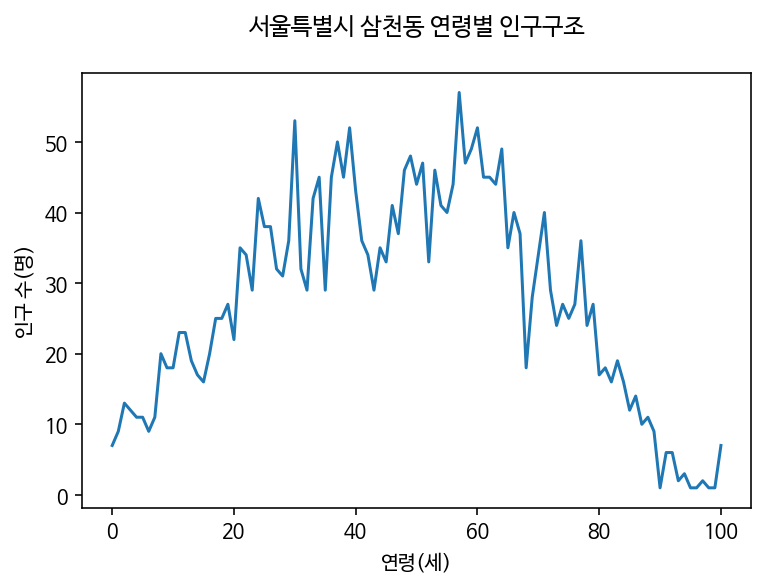

In [ ]:
# x축: 나이
x = np.arange(0, 101) # 0세부터 ~ 100세까지

# 세로축은 인구수 // 삼천동 인구수
y = df_samcheondong.values # 인구수
y = y.flatten().tolist()  # 연령
plt.plot(x, y) # visualization
plt.title('서울특별시 삼천동 연령별 인구구조', pad=20) # title
plt.xlabel(xlabel='연령(세)') # x축
plt.ylabel(ylabel='인구 수(명)') #  y축
plt.show()

## 실습 2. '종로구' 의 인구 구조를,  0세부터 100세 까지 나이대 별로 몇명이 있는지 시각화 하세요. 
- 가로축은 나이, 세로축은 인구수

In [ ]:
df_jonglogu = df[df['행정구역'].str.contains('종로구')].iloc[:1,] # 서울특별시 종로구 
df_jonglogu_pop = df_jonglogu.drop(columns=['행정구역', '2019년07월_계_총인구수', '2019년07월_계_연령구간인구수']) # 행정구여그 총인구수, 연령구간 인구수 컬럼 삭제
df_jonglogu_pop

,2019년07월_계_0세,2019년07월_계_1세,2019년07월_계_2세,2019년07월_계_3세,2019년07월_계_4세,2019년07월_계_5세,2019년07월_계_6세,2019년07월_계_7세,2019년07월_계_8세,2019년07월_계_9세,2019년07월_계_10세,2019년07월_계_11세,2019년07월_계_12세,2019년07월_계_13세,2019년07월_계_14세,2019년07월_계_15세,2019년07월_계_16세,2019년07월_계_17세,2019년07월_계_18세,2019년07월_계_19세,2019년07월_계_20세,2019년07월_계_21세,2019년07월_계_22세,2019년07월_계_23세,2019년07월_계_24세,2019년07월_계_25세,2019년07월_계_26세,2019년07월_계_27세,2019년07월_계_28세,2019년07월_계_29세,2019년07월_계_30세,2019년07월_계_31세,2019년07월_계_32세,2019년07월_계_33세,2019년07월_계_34세,2019년07월_계_35세,2019년07월_계_36세,2019년07월_계_37세,2019년07월_계_38세,2019년07월_계_39세,...,2019년07월_계_61세,2019년07월_계_62세,2019년07월_계_63세,2019년07월_계_64세,2019년07월_계_65세,2019년07월_계_66세,2019년07월_계_67세,2019년07월_계_68세,2019년07월_계_69세,2019년07월_계_70세,2019년07월_계_71세,2019년07월_계_72세,2019년07월_계_73세,2019년07월_계_74세,2019년07월_계_75세,2019년07월_계_76세,2019년07월_계_77세,2019년07월_계_78세,2019년07월_계_79세,2019년07월_계_80세,2019년07월_계_81세,2019년07월_계_82세,2019년07월_계_83세,2019년07월_계_84세,2019년07월_계_85세,2019년07월_계_86세,2019년07월_계_87세,2019년07월_계_88세,2019년07월_계_89세,2019년07월_계_90세,2019년07월_계_91세,2019년07월_계_92세,2019년07월_계_93세,2019년07월_계_94세,2019년07월_계_95세,2019년07월_계_96세,2019년07월_계_97세,2019년07월_계_98세,2019년07월_계_99세,2019년07월_계_100세 이상
1,620,604,735,869,849,857,980,919,992,929,959,1119,1062,1048,1005,1145,1168,1245,1481,1761,1878,1981,2256,2408,2424,2516,2689,2585,2475,2337,2152,2171,2067,1935,1936,1928,2051,2186,2183,2215,...,2237,2181,2084,2200,1727,1680,1673,1228,1424,1429,1512,1390,1100,1281,1114,1293,1334,1125,998,929,799,744,659,579,478,385,340,298,240,213,153,144,115,80,70,63,67,40,37,247


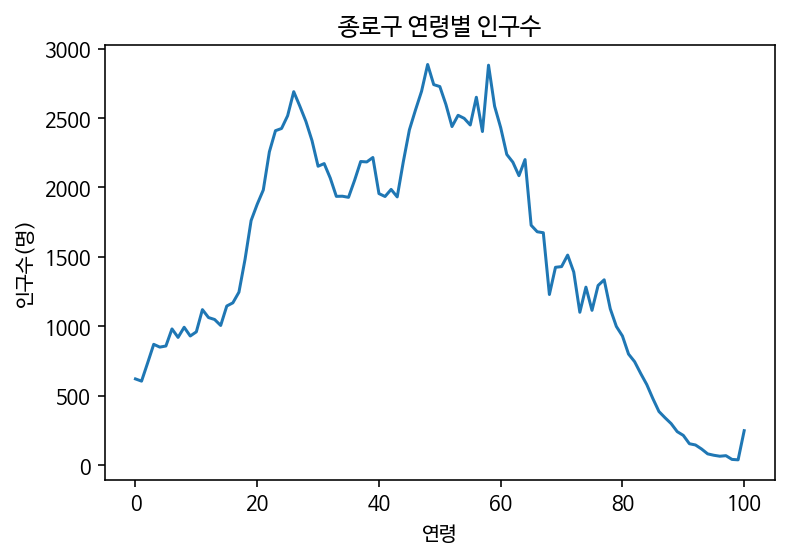

In [ ]:
x = np.arange(0, 100+1) # for 연령구간
y = df_jonglogu_pop.values # 종로구 연령별 인구수
y = y.flatten().tolist() # np.array를 list로 변환

# visualization
plt.plot(x, y)
plt.title('종로구 연령별 인구수')
plt.xlabel('연령')
plt.ylabel('인구수(명)')
plt.show()

## 실습 3. 위의 '종로구' 의 인구 구조를,  만0세, 15, 25, 35, 45세 까지 5개 파이차트로, 각 인구수를 시각화 하세요. 


In [ ]:
df_jonglogu_five = df_jonglogu_pop[['2019년07월_계_0세','2019년07월_계_15세', '2019년07월_계_25세', '2019년07월_계_35세', '2019년07월_계_45세']] # 5개의 연령대 // DataFrame
labels = df_jonglogu_five.columns.tolist()
df_jonglogu_five = df_jonglogu_five.values.flatten().tolist() # numpy array to list // list
df_jonglogu_five

[620, 1145, 2516, 1928, 2414]

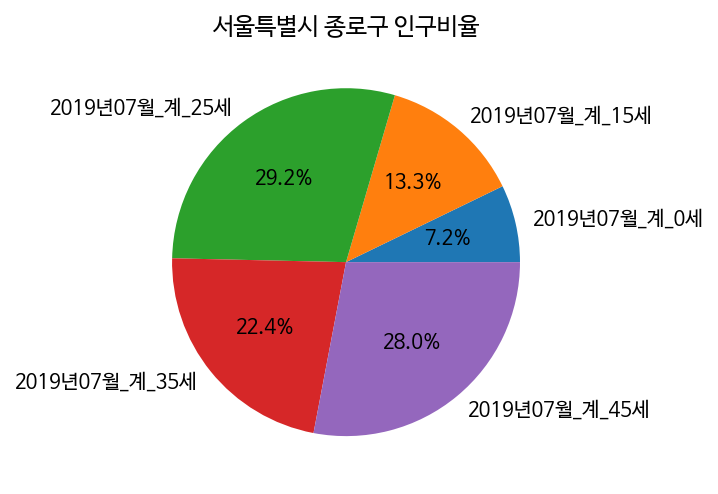

In [ ]:
plt.pie(x=df_jonglogu_five, labels=labels, autopct='%.1f%%') # x: 값, labels: 항목명, autopct: 비율
plt.title('서울특별시 종로구 인구비율')
plt.show()